## Gather Data 
##### This step requires gathering data from three different datasources to create analysis and visualization for WeRateDogs.
"they're good dogs Brent." :)

1) Enhanced twitter archive has already been created by the trainer. It is available in twitter-archive-enhanced.csv file.
<br> 2) The retweet and favourite count are to be acquired from twitter API tweepy
<br> 3) Results of image predictions are in udacity servers. These files have to be programmatically downloaded.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json

In [2]:
# Dataset 1: Read twitter-archive-enhanced dataset provided by the instructor.
df1 = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
# look at the sample data for df1
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
# Get data from Udacity server and load it to image_predictions.tsv

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

response.content

# Ref: Lesson Gathering Data - 8 (Web Scraping 0.49s)

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [5]:
# using docstring as image predictions data is already loaded into the file locally. Uncomment when running afresh.
'''
with open ("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)
'''

'\nwith open ("image-predictions.tsv", mode = \'wb\') as file:\n    file.write(response.content)\n'

In [6]:
# Dataset 2: Read image-predictions.tsv downloaded locally
df2 = pd.read_csv('image-predictions.tsv', sep = '\t')

# look at the sample data for df2
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Use Tweepy and download retweet_count & favorite_count data from twitter API
'''
consumer_key = 'XYZ'
consumer_secret = 'XYZ'
access_token = 'XYZ'
access_secret = 'XYZ'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

'''

In [8]:
# Get data for a sample tweet id
'''tweet_id = '889278841981685760' '''

#test = api.get_status(tweet_id, tweet_mode='extended')
'''test = api.get_status(tweet_id)'''

In [9]:
# using docstring as twitter data is already downloaded into the file locally. Uncomment when running afresh.

'''
from timeit import default_timer as timer

tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

'''

'\nfrom timeit import default_timer as timer\n\ntweet_ids = df.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')\n            print("Success")\n            json.dump(tweet._json, outfile)\n            outfile.write(\'\n\')\n        except tweepy.TweepError as e:\n            print("Fail")\n            fails_dict[tweet_id] = e\n            pass\nend = timer()\nprint(end - start)\nprint(fails_dict)\n\n'

In [10]:
# https://stackoverflow.com/questions/27351207/gracefully-handle-errors-and-exceptions-for-user-timeline-method-in-tweepy

In [11]:
# Unlike what the instructor suggested, couldnt use the artcle below to load the dataframe
# https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

'''
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for p in data['id']:
        print('id: ' + p['id'])
'''

"\nwith open('tweet_json.txt') as json_file:\n    data = json.load(json_file)\n    for p in data['id']:\n        print('id: ' + p['id'])\n"

In [12]:
# Instead logic from below knowledege article was used
# https://knowledge.udacity.com/questions/28389

df3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])

with open('tweet_json.txt') as f:
    for line in f:
        status  = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df3 = df3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                        columns=['tweet_id', 'retweet_count', 'favorite_count']))
df3 = df3.reset_index(drop=True)
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7938,37137
1,892177421306343426,5900,31938
2,891815181378084864,3899,24059
3,891689557279858688,8089,40451
4,891327558926688256,8779,38671
5,891087950875897856,2914,19441
6,890971913173991426,1937,11337
7,890729181411237888,17702,62634
8,890609185150312448,4020,26744
9,890240255349198849,6905,30630


## Assess Data
This step requires identifying data quality and tidiness issues in the WeRateDogs dataset we put together.
###### DataQuality Issues:
1) Non descriptive column headers in df2 (p1, p1_conf, p1_dog and so on)
<br> 2) expanded_urls in df1 missing data which means image predictions couldnt be possible.
<br> 3) Missing data in df1 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id)
<br> 4) DF1 denominator has values > 10. All denominators are supposed to be 10. Numerator correction not required. ("they're good dogs Brent.")
<br> 5) Several dog names are incorrectly identified. Some are not even dog photos. Examples are (a, an, all, by, His, such, not, one, very, O,my,this,unacceptable,the,life,Jo, quite) - Visual assesment
<br> 6) Some of the records in the data set are retweets.
<br> 7) Image Prediction dataset: P1, P2, P3 columns start with Upper case and Lower case. And there are underscores in between where there should be spaces.
<br> 8) Timestamp is stored as object(str) should be datetime.
###### Tidiness Issues:
1) doggo, floofer, pupper, puppo should be 4 categorical values in 1 column(stages of dog)
<br> 2) Multiple columns can be removed from twitter-archive-enhanced and image_predictions datasets; and all the datasets can be merged into one dataset because they are at same granularity (TweetID)
<br> 3) Prediction columns should be 4 columns instead of 9. (PredictionNumber, DogVariety, ConfidencePercent, IsDogFlag)

In [13]:
# Missing data in columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id)
# expanded_urls in df1 missing data which means image predictions couldnt be possible.

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Several dog names are incorrectly identified.Examples are (a, an, all, by, His, such, not, one, very, O,my,this,unacceptable,the,life,Jo, quite)

df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [15]:
# DF1 denominator has values > 10. All denominators are supposed to be 10.

df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
# Non descriptive column headers (p1, p1_conf, p1_dog and so on)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# Image Prediction dataset: P1, P2, P3 column values start with Upper case and Lower case. 
# There are underscores in between where there should be spaces.

df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null object
favorite_count    2333 non-null object
dtypes: object(3)
memory usage: 54.8+ KB


In [19]:
# Some are not even dog photos.and the neural n/w identified them. Interesting!!

df2.query('p1_dog == False').tweet_id.count()

543

In [20]:
# Some of the records in the data set are retweets.

df1[df1.retweeted_status_id.notnull()].tweet_id.count()

181

In [21]:
# Timestamp is stored as object(str) should be datetime.

type(df1['timestamp'][20])

str

## Clean Data
This process involves three steps. 
<br> Define: convert our assessments into defined cleaning tasks so that they serve as an instruction list.
<br> Code: convert the definitions to code and run that code.
<br> Test: test the dataset to make sure the cleaning operations worked.

###### Define: (Quality issues fix)
1) Issue: Non descriptive column headers in df2 (p1, p1_conf, p1_dog and so on)
<br> Fix: Replace it descriptive column headers (example: prediction1, prediction1_confidence, prediction1_isdog)
<br> 
<br> 2) Issue: expanded_urls in df1 missing data which means image predictions couldnt be possible.
<br> Fix: Remove records that have expanded URL's missing.
<br> 
<br> 3) Issue: Missing data in df1 columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id)
<br> Fix: After fixing issue 6, remove these columns. They are not needed anymore.
<br> 
<br> 4) Issue: DF1 denominator has values other than 10. All denominators are supposed to be 10. Numerator correction not required. ("they're good dogs Brent.")
<br> Fix: Make all denominator values as 10.
<br> 
<br> 5) Issue: Several dog names are incorrectly identified. Some are not even dog photos. Examples are (a, an, all, by, His, such, not, one, very, O,my,this,unacceptable,the,life,Jo, quite) - Visual assesment
<br> Fix: Replace the incorrectly identified dog names above with None.
<br> 
<br> 6) Issue: Some of the records in the data set are retweets.
<br> Fix: Remove records with Retweets as we need only original ratings.
<br> 
<br> 7) Issue: Image Prediction dataset: P1, P2, P3 (dogbreed) columns start with Upper case and Lower case. And there are underscores in between where there should be spaces.
<br> Fix: Make all these columns start with Upper case and replace underscore with spaces.
<br> 
<br> 8) Issue: Timestamp is stored as object should be datetime.
<br> Fix: Convert timestamp column datatype to datetime.

###### Define: (Tidiness issues fix)
1) Issue: doggo, floofer, pupper, puppo should be 4 categorical values in 1 column(stages of dog)
<br> Fix: Convert these 4 columns to 1 column with 4 categorical values.
<br> 
<br> 2) Issue: Multiple columns can be removed from twitter-archive-enhanced and image_predictions datasets; and all the datasets can be merged into one dataset because they are at same granularity (TweetID)
<br> Fix: Merge all the cleansed datasets to one.
<br> 
<br> 3) Issue: Prediction columns should be 4 columns instead of 9. (PredictionNumber, DogVariety, ConfidencePercent, IsDogFlag)
<br> Fix: deferred as only two tidiness issues have to be fixed.

In [22]:
# Creating a copy of dataframes to retain original df

df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

In [23]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# Fix1: Replace df2 with descriptive column headers
df2_clean.rename(columns={'img_num': 'image_number','p1': 'p1_dogbreed', 'p2': 'p2_dogbreed','p3': 'p3_dogbreed','p1_conf':'p1_confidence','p2_conf':'p2_confidence','p3_conf':'p3_confidence','p1_dog':'p1_isdog','p2_dog':'p2_isdog','p3_dog':'p3_isdog'}, inplace=True)

In [25]:
# Test Fix1: Verified the column headers have been renamed to descriptive ones.
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null int64
jpg_url          2075 non-null object
image_number     2075 non-null int64
p1_dogbreed      2075 non-null object
p1_confidence    2075 non-null float64
p1_isdog         2075 non-null bool
p2_dogbreed      2075 non-null object
p2_confidence    2075 non-null float64
p2_isdog         2075 non-null bool
p3_dogbreed      2075 non-null object
p3_confidence    2075 non-null float64
p3_isdog         2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# Fix2: Remove records that have expanded URL's missing.
df1_clean.dropna(subset = ['expanded_urls'],inplace = True)

In [27]:
# Test Fix2: Remove records that have expanded URL's missing.
df1_clean[df1_clean.expanded_urls.isnull()].tweet_id.count()

0

In [28]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null object
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: float64(4), int64(3), ob

In [29]:
# Fix 6: Remove records with Retweets as we need only original ratings.
df1_clean[df1_clean.retweeted_status_id.notnull()].tweet_id.count()

180

In [30]:
# Test Fix 6: Remove records with Retweets as we need only original ratings.
df1_clean = df1_clean[df1_clean.retweeted_status_id.isnull()]

df1_clean[df1_clean.retweeted_status_id.notnull()].tweet_id.count()

0

In [31]:
# Fix3: remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id columns from df1
df1_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace = True)

In [32]:
# Test Fix3: remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id columns from df1
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


In [33]:
# Fix4: Make all denominator values as 10.
'''df1_clean.rating_denominator.value_counts()'''
df1_clean.rating_denominator.replace([50, 11, 80, 7,170,150,130,120,110,90,70,40,20,2], 10, inplace = True)

In [34]:
# Test Fix4: Make all denominator values as 10.
df1_clean.rating_denominator.value_counts()

10    2117
Name: rating_denominator, dtype: int64

In [35]:
# Fix5: Replace the incorrectly identified dog names above with None.
'''df1_clean.name.value_counts()'''

df1_clean.name.replace(['a', 'an', 'all', 'by', 'His', 'such', 'not', 'one', 'very', 'O','my','this','unacceptable','the','life','quite'], 'None', inplace = True)

In [36]:
# TEST Fix5: Replace the incorrectly identified dog names above with None.

df1_clean.name.value_counts()

None           712
Charlie         11
Lucy            11
Oliver          10
Cooper          10
Tucker           9
Penny            9
Sadie            8
Winston          8
Lola             8
Toby             7
Daisy            7
Bailey           6
Oscar            6
Jax              6
Bo               6
Stanley          6
Koda             6
Bella            6
Bentley          5
Dave             5
Milo             5
Leo              5
Rusty            5
Scout            5
Louis            5
Buddy            5
Chester          5
Jerry            4
Maggie           4
              ... 
Malikai          1
Wishes           1
infuriating      1
Al               1
Happy            1
Genevieve        1
Joey             1
Kallie           1
Ito              1
Ralphson         1
Skittle          1
Naphaniel        1
Rhino            1
Huxley           1
Steve            1
Ed               1
Mitch            1
Doobert          1
Meyer            1
Harlso           1
Brownie          1
Bronte      

In [37]:
# TEST Fix5: Replace the incorrectly identified dog names above with None.

inames = ['a', 'an', 'all', 'by', 'His', 'such', 'not', 'one', 'very', 'O','my','this','unacceptable','the','life','quite'] #['Charlie']

df1_clean[df1_clean.name.isin(inames)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [38]:
# Fix7: Make all these dog breed columns start with Upper case and replace underscore with spaces.

df2_clean.p1_dogbreed.replace('_', ' ', regex=True, inplace = True)
df2_clean.p2_dogbreed.replace('_', ' ', regex=True, inplace = True)
df2_clean.p3_dogbreed.replace('_', ' ', regex=True, inplace = True)

In [39]:
df2_clean['p1_dogbreed'] = df2_clean.p1_dogbreed.str.title()
df2_clean['p2_dogbreed'] = df2_clean.p2_dogbreed.str.title()
df2_clean['p3_dogbreed'] = df2_clean.p3_dogbreed.str.title()

In [40]:
df2_clean.head()

,tweet_id,jpg_url,image_number,p1_dogbreed,p1_confidence,p1_isdog,p2_dogbreed,p2_confidence,p2_isdog,p3_dogbreed,p3_confidence,p3_isdog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [41]:
#Fix8: Convert timestamp column datatype to datetime.
    
df1_clean["timestamp"]= pd.to_datetime(df1_clean["timestamp"])

In [42]:
# Test Fix8: Convert timestamp column datatype to datetime.
type(df1_clean['timestamp'][20])

pandas._libs.tslibs.timestamps.Timestamp

In [43]:
#Fix Tidiness Issue1: Convert these 4 columns (doggo, floofer, pupper, puppo) to 1 column with 4 categorical values.

df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     2117 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 328.1+ KB


In [44]:
# Melt to convert 4 columns into 1 colum with 4 categorical value
df1_cleanmelt = df1_clean.melt(id_vars=['tweet_id'], 
              value_vars=['doggo', 'floofer', 'pupper','puppo'], value_name='dog_stage')

df1_cleanmelt = df1_cleanmelt.drop('variable', axis=1)

In [45]:
# verify data in the dog_stage column
df1_cleanmelt.head()

,tweet_id,dog_stage
0,892420643555336193,None
1,892177421306343426,None
2,891815181378084864,None
3,891689557279858688,None
4,891327558926688256,None


In [46]:
# since the column is sparsely populated verify if the data is loaded to the dog_stage column properly. Save only records with values.

inames = ['doggo', 'floofer', 'pupper','puppo']

df1_cleanmelt = df1_cleanmelt[df1_cleanmelt.dog_stage.isin(inames)]

df1_cleanmelt.head()

,tweet_id,dog_stage
9,890240255349198849,doggo
39,884162670584377345,doggo
86,872967104147763200,doggo
94,871515927908634625,doggo
95,871102520638267392,doggo


In [47]:
# Check values counts for different dog stages

df1_cleanmelt.dog_stage.value_counts()

pupper     232
doggo       84
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [48]:
# Merge dataframe to df1_clean df

df1_combined = df1_clean.merge(df1_cleanmelt, left_on='tweet_id', right_on='tweet_id', how='left')

In [49]:
df1_combined.dog_stage.value_counts()

pupper     232
doggo       84
puppo       24
floofer     10
Name: dog_stage, dtype: int64

In [50]:
# Check columns in df1_combined dataframe

df1_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2129 entries, 0 to 2128
Data columns (total 15 columns):
tweet_id                 2129 non-null int64
in_reply_to_status_id    24 non-null float64
in_reply_to_user_id      24 non-null float64
timestamp                2129 non-null datetime64[ns]
source                   2129 non-null object
text                     2129 non-null object
expanded_urls            2129 non-null object
rating_numerator         2129 non-null int64
rating_denominator       2129 non-null int64
name                     2129 non-null object
doggo                    2129 non-null object
floofer                  2129 non-null object
pupper                   2129 non-null object
puppo                    2129 non-null object
dog_stage                350 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 266.1+ KB


In [51]:
# drop following columns from df1_combined dataframe 'doggo', 'floofer', 'pupper','puppo'

df1_combined.drop(['in_reply_to_status_id', 'in_reply_to_user_id','doggo','floofer','pupper','puppo'], axis = 1,inplace = True)

In [52]:
# Test Fix Tidiness Issue1: Convert these 4 columns (doggo, floofer, pupper, puppo) to 1 column with 4 categorical values.
df1_combined.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [53]:
# Fix Tidiness Issue 2: Merge all the cleansed datasets to one.

df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id         2075 non-null int64
jpg_url          2075 non-null object
image_number     2075 non-null int64
p1_dogbreed      2075 non-null object
p1_confidence    2075 non-null float64
p1_isdog         2075 non-null bool
p2_dogbreed      2075 non-null object
p2_confidence    2075 non-null float64
p2_isdog         2075 non-null bool
p3_dogbreed      2075 non-null object
p3_confidence    2075 non-null float64
p3_isdog         2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [54]:
# Merge df2_clean to our base dataframe df1_combined
df1_combined = df1_combined.merge(df2_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [55]:
# Verify columns available in df1_combined after merge
df1_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 20 columns):
tweet_id              2005 non-null int64
timestamp             2005 non-null datetime64[ns]
source                2005 non-null object
text                  2005 non-null object
expanded_urls         2005 non-null object
rating_numerator      2005 non-null int64
rating_denominator    2005 non-null int64
name                  2005 non-null object
dog_stage             317 non-null object
jpg_url               2005 non-null object
image_number          2005 non-null int64
p1_dogbreed           2005 non-null object
p1_confidence         2005 non-null float64
p1_isdog              2005 non-null bool
p2_dogbreed           2005 non-null object
p2_confidence         2005 non-null float64
p2_isdog              2005 non-null bool
p3_dogbreed           2005 non-null object
p3_confidence         2005 non-null float64
p3_isdog              2005 non-null bool
dtypes: bool(3), datetime64[ns](1

In [56]:
# Verify the column data types in df3_clean
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null object
retweet_count     2333 non-null object
favorite_count    2333 non-null object
dtypes: object(3)
memory usage: 54.8+ KB


In [57]:
# There is an issue with tweet_id column in df3_clean. This is of string type. Convert tweet_id in df1_combined to string datatype.
df1_combined["tweet_id"]= df1_combined["tweet_id"].astype(str)

In [58]:
# Merge df2_clean to our base dataframe df1_combined. df1_combined has df1_clean + df2_clean
df1_combined = df1_combined.merge(df3_clean, left_on='tweet_id', right_on='tweet_id', how='left')

In [59]:
df1_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 22 columns):
tweet_id              2005 non-null object
timestamp             2005 non-null datetime64[ns]
source                2005 non-null object
text                  2005 non-null object
expanded_urls         2005 non-null object
rating_numerator      2005 non-null int64
rating_denominator    2005 non-null int64
name                  2005 non-null object
dog_stage             317 non-null object
jpg_url               2005 non-null object
image_number          2005 non-null int64
p1_dogbreed           2005 non-null object
p1_confidence         2005 non-null float64
p1_isdog              2005 non-null bool
p2_dogbreed           2005 non-null object
p2_confidence         2005 non-null float64
p2_isdog              2005 non-null bool
p3_dogbreed           2005 non-null object
p3_confidence         2005 non-null float64
p3_isdog              2005 non-null bool
retweet_count         1998 non-n

In [61]:
df1_combined.to_csv('twitter_archive_master.csv', index = False)

In [62]:
df4 = df1_combined.copy()

In [63]:
df4['tweet_source'] = pd.np.where(df4.source.str.contains("iphone"), "iphone",
                   pd.np.where(df4.source.str.contains("TweetDeck"), "TweetDeck",
                   pd.np.where(df4.source.str.contains("Web Client"), "WebClient", "Unknown")))

In [64]:
df4.tweet_source.value_counts()

iphone       1966
WebClient      28
TweetDeck      11
Name: tweet_source, dtype: int64

In [65]:
%matplotlib inline

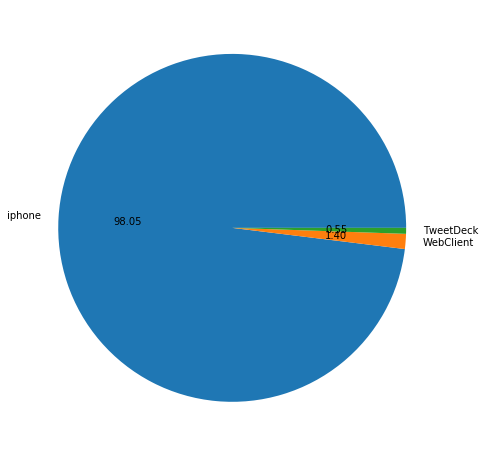

In [66]:
df4.tweet_source.value_counts().plot(kind='pie', label='', figsize = (8,8), autopct='%.2f');

In [67]:
# Most favorited dog in the dataset

df6 = df4[df4['favorite_count']==df4['favorite_count'].max()]

In [68]:
# Details about Most favorited dog in the dataset

df6[['name','dog_stage','text','p1_dogbreed','p1_confidence','rating_numerator','rating_denominator','retweet_count','favorite_count','jpg_url']]

,name,dog_stage,text,p1_dogbreed,p1_confidence,rating_numerator,rating_denominator,retweet_count,favorite_count,jpg_url
784,None,doggo,Here's a doggo realizing you can stand in a po...,Labrador Retriever,0.825333,13,10,80282,160487,https://pbs.twimg.com/ext_tw_video_thumb/74423...


In [69]:
# https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe

pd.options.display.max_colwidth = 1000

df6['jpg_url'].to_string(index=False)

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [71]:
#Image of the most favorited dog in the dataset
from IPython.display import Image, HTML

HTML('<img src="'+ df6['jpg_url'].to_string(index = False) + '" width="150" >')

In [72]:
# Most retweeted dog in the dataset

df6 = df4[df4['retweet_count']==df4['retweet_count'].max()]

In [73]:
# Details about Most retweeted dog in the dataset

df6[['name','dog_stage','text','p1_dogbreed','p1_confidence','rating_numerator','rating_denominator','retweet_count','favorite_count','jpg_url']]

,name,dog_stage,text,p1_dogbreed,p1_confidence,rating_numerator,rating_denominator,retweet_count,favorite_count,jpg_url
784,None,doggo,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,Labrador Retriever,0.825333,13,10,80282,160487,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg


In [74]:
df6['jpg_url'].to_string(index=False)

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [75]:
#Image of the most retweeted dog in the dataset

HTML('<img src="'+ df6['jpg_url'].to_string(index = False) + '" width="150" >')

In [76]:
# Dog with the highest rating in the dataset

df6 = df4[df4['rating_numerator']==df4['rating_numerator'].max()]

In [77]:
# Details about dog with highest rating in the dataset

df6[['name','dog_stage','text','p1_dogbreed','p1_confidence','p2_dogbreed','p2_confidence','p3_dogbreed','p3_confidence','rating_numerator','rating_denominator','retweet_count','favorite_count','jpg_url']]

,name,dog_stage,text,p1_dogbreed,p1_confidence,p2_dogbreed,p2_confidence,p3_dogbreed,p3_confidence,rating_numerator,rating_denominator,retweet_count,favorite_count,jpg_url
735,Atticus,NaN,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Bow Tie,0.533941,Sunglasses,0.080822,Sunglass,0.050776,1776,10,2528,5252,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg


In [78]:
df6['jpg_url'].to_string(index=False)

'https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg'

In [79]:
#Image of dog with highest rating in the dataset

HTML('<img src="'+ df6['jpg_url'].to_string(index = False) + '" width="150" >')

In [80]:
df5 = df4.query('p1_isdog == True')

df5['rating_numerator'].mean()

11.5635507733692

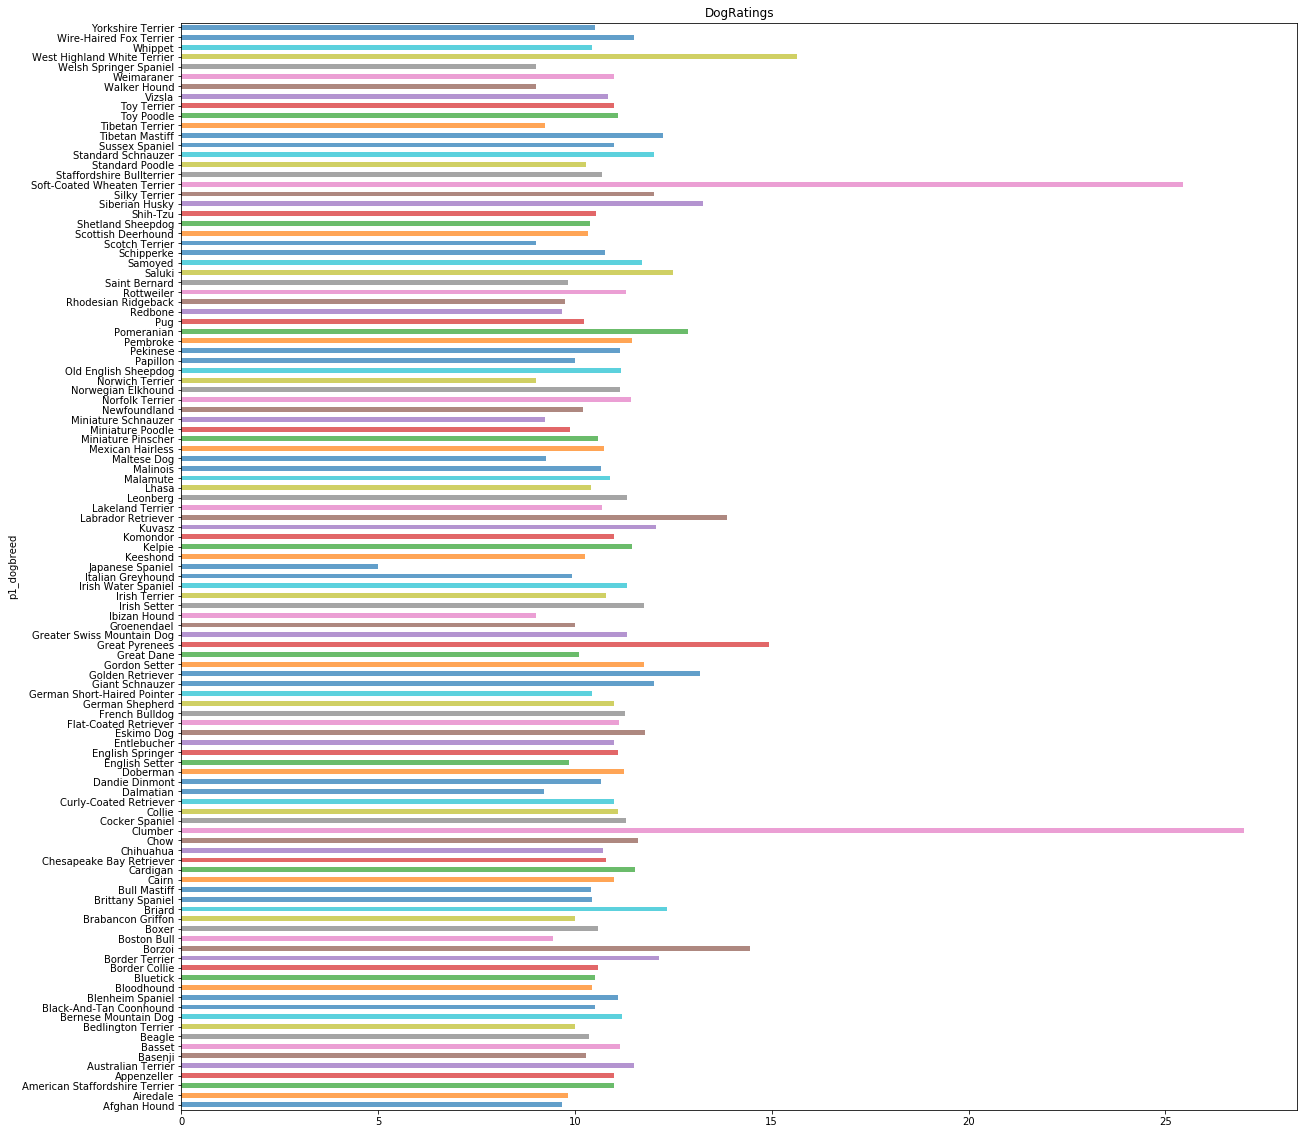

In [81]:
# Dog ratings by breed (only taking p1_dogbreed into account)

df5.groupby('p1_dogbreed')['rating_numerator'].mean().plot(kind = 'barh',title = 'DogRatings', alpha = .7 , figsize = (20,20));

In [82]:
df6 = df4.query('p1_isdog != True & rating_numerator != 1776')
df6['rating_numerator'].mean()

10.909090909090908

In [83]:
# Dogs(dog breeds) predicted with high confidence

df4.query('p1_confidence > .999 & p1_isdog == True').p1_dogbreed.value_counts()

Chow                    4
Pug                     3
Rottweiler              1
Dalmatian               1
Labrador Retriever      1
Komondor                1
Great Dane              1
Old English Sheepdog    1
French Bulldog          1
Name: p1_dogbreed, dtype: int64

In [84]:
# Dogs(dog breeds) predicted with high confidence

df7 = df4.query('p1_confidence > .999 & p1_isdog == True')

In [85]:
df8 = df7[['p1_dogbreed','p1_confidence','jpg_url']]

In [86]:
# Display dog images, predicted breeds and their prediction confidence

def path_to_image_html(path):
    return '<img src="'+ path + '" width="100" >'

HTML(df8.to_html(escape=False ,formatters=dict(jpg_url=path_to_image_html),index = False))

p1_dogbreed,p1_confidence,jpg_url
French Bulldog,0.999201,
Pug,0.999120,
Old English Sheepdog,0.999715,
Dalmatian,0.999828,
Chow,0.999823,
Chow,0.999953,
Chow,0.999837,
Labrador Retriever,0.999885,
Great Dane,0.999223,
Pug,0.999044,


In [87]:
# Get day of the week from timestamp

df4['dayofweek'] = df4['timestamp'].dt.day_name()

In [88]:
# Get timepart from timestamp

df4['timepart'] = df4['timestamp'].dt.hour

In [89]:
df4.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p2_confidence,p2_isdog,p3_dogbreed,p3_confidence,p3_isdog,retweet_count,favorite_count,tweet_source,dayofweek,timepart
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.085851,False,Banana,0.076110,False,7938,37137,iphone,Tuesday,16
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.090647,True,Papillon,0.068957,True,5900,31938,iphone,Tuesday,0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.078253,True,Kelpie,0.031379,True,3899,24059,iphone,Monday,0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.168086,True,Spatula,0.040836,False,8089,40451,iphone,Sunday,15
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.225770,True,German Short-Haired Pointer,0.175219,True,8779,38671,iphone,Saturday,16


In [90]:
# Create bins to show time of the day

#https://stackoverflow.com/questions/50442808/how-to-bin-timestamps-in-python-and-assign-labels

bin_edges = [-1,6,12,17,20,23]

bin_names = ['LateNight','Morning' , 'Noon' , 'Evening','Night' ] 

df4['timeofday'] = pd.cut(df4['timepart'], bin_edges, labels=bin_names)

df4.timeofday.value_counts()

LateNight    1041
Noon          459
Evening       257
Night         248
Morning         0
Name: timeofday, dtype: int64

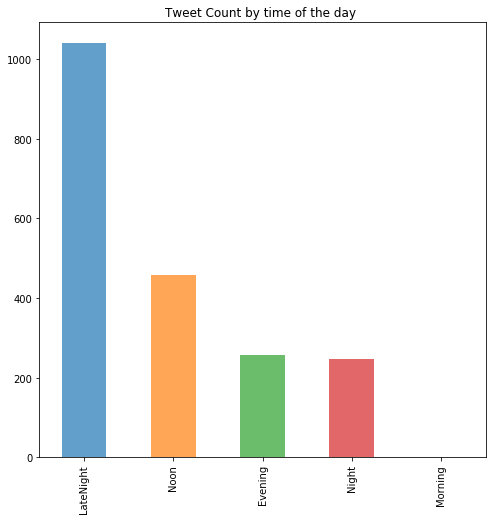

In [91]:
# Plot barchart to show Tweet Count by time of the day 

df4.timeofday.value_counts().plot(kind = 'bar',title = 'Tweet Count by time of the day ', alpha = .7 , figsize = (8,8));